In [17]:
import torch
def display_vram_stats():
    left, total = torch.cuda.mem_get_info()
    print(f"Used space - {total/1024/1024/1024 - left/1024/1024/1024}GB/{total/1024/1024/1024}GB")

In [18]:
display_vram_stats()

Used space - 21.45684814453125GB/23.5882568359375GB


In [1]:
import os

In [55]:
DATA_DIR = '/workspace/knowledge-base-chat-bot-develop/data/kzsk'

DOCUMENTS_DATA_DIR = os.path.join(DATA_DIR, 'documents')
QUESTIONS_DATA_DIR = os.path.join(DATA_DIR, 'questions')
IMAGES_DATA_DIR = os.path.join(DATA_DIR, 'images')

PAGES_DATA_DIR = os.path.join(IMAGES_DATA_DIR, 'pages')

DOCUMENTS_NAMES = os.listdir(DOCUMENTS_DATA_DIR)
PAGES_NAMES = os.listdir(PAGES_DATA_DIR)

In [3]:
os.listdir(DOCUMENTS_DATA_DIR)

['RU2748330C2_20210524.pdf',
 'Гидросилилирование обзор.pdf',
 'Ю.Д. Семчиков - Высокомолекулярные соединения,.pdf',
 'получение полиметилгидридметилсилоксана.pdf',
 'фторсилоксаны.pdf',
 '.ipynb_checkpoints']

In [4]:
documents = []

- Dolphin
- Abbyy
- pytesseract
- pymupdf
- docling
- boa(https://github.com/ndlrf-rnd/progress-boa/tree/main)
- pdfminer.six(https://github.com/pdfminer/pdfminer.six)
- marker(https://github.com/datalab-to/marker)

# Docling

In [5]:
import json
import logging
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [6]:
from docling.document_converter import DocumentConverter

In [7]:
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [ ]:
def vllm_local_options(model: str):
    options = PictureDescriptionApiOptions(
        url="Qwen/Qwen2.5-VL-3B-Instruct",
        params=dict(
            model=model,
            seed=42,
            max_completion_tokens=200,
        ),
        prompt="Describe the image in three sentences. Be consise and accurate.",
        timeout=90,
    )
    return options

In [97]:
# VRAM 420 MB for ibm-granite/granite-vision-3.1-2b-preview

# DocParsing with metadata captured from vision models
# ----------------------
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.do_formula_enrichment=False
#pipeline_options.do_picture_description=True
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True
pipeline_options.table_structure_options.do_cell_matching = True
pipeline_options.ocr_options.lang = ["ru", "en"]  
pipeline_options.enable_remote_services=True
#pipeline_options.picture_description_options = lms_local_options(
#        model="smolvlm-256m-instruct"
#    )

pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=4, device=AcceleratorDevice.AUTO
)

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [90]:
input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[3])
print(input_doc_path)

/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/получение полиметилгидридметилсилоксана.pdf


In [98]:
page_number = 5

input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[3])
print(input_doc_path)

start_time = time.time()
conv_result = doc_converter.convert(input_doc_path, page_range=(page_number, page_number))
end_time = time.time() - start_time

_log.info(f"Document converted in {end_time:.2f} seconds.")
# VRAM - 1040 MB - 1 page

INFO:docling.datamodel.document:detected formats: [<InputFormat.PDF: 'pdf'>]
INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 883e446afec949951c7a0a9545c071b4
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'


/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/получение полиметилгидридметилсилоксана.pdf


INFO:easyocr.easyocr:Download complete
INFO:easyocr.easyocr:Download complete.
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.pipeline.base_pipeline:Processing document получение полиметилгидридметилсилоксана.pdf
INFO:docling.document_converter:Finished converting document получение полиметилгидридметилсилоксана.pdf in 6.87 sec.
INFO:__main__:Document converted in 6.88 seconds.


PageItem(size=Size(width=595.2999877929688, height=841.8999633789062), image=ImageRef(mimetype='image/png', dpi=72, size=Size(width=595.0, height=842.0), uri=AnyUrl('')), page_no=5)
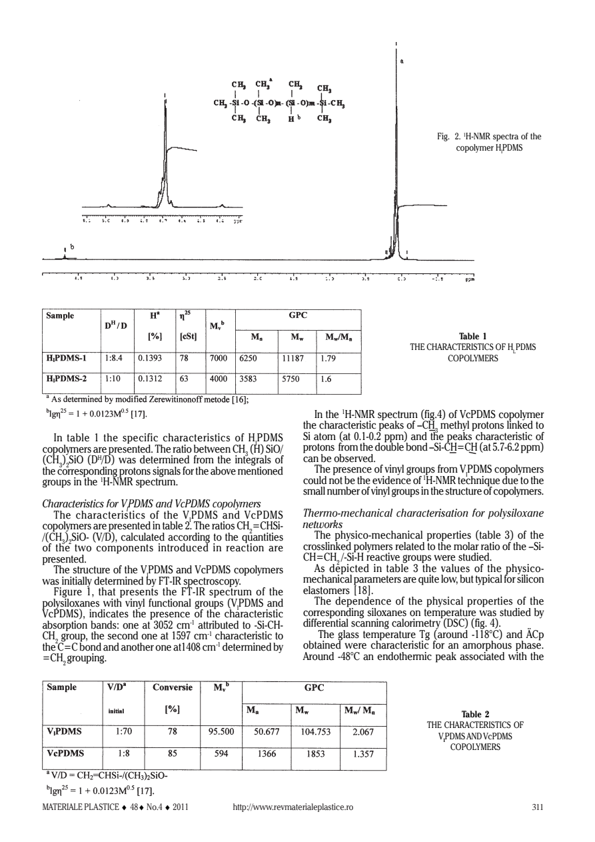

In [99]:
page

In [92]:
# Save page images
for page_no, page in conv_result.document.pages.items():
    page_no = page.page_no
    print(page_no)
    page_image_filename = os.path.join(PAGES_DATA_DIR, f'1.png')
    page.image.pil_image.save(page_image_filename, format="PNG")
    print(page_image_filename)

5
/workspace/knowledge-base-chat-bot-develop/data/kzsk/images/pages/1.png


In [100]:
conv_result.document.export_to_markdown()

'Table  1 THE CHARACTERISTICS OF H L PDMS COPOLYMERS\n\n<!-- image -->\n\n| Sample   | DH /D   | H"     | 25    | Mv   | GPC   | GPC   | GPC   |\n|----------|---------|--------|-------|------|-------|-------|-------|\n|          |         | [%]    | [cSt] |      | Mn    | Mw    | Mw/Mn |\n| HPDMS-1  | 1:8.4   | 0.1393 | 78    | 7000 | 6250  | 11187 | 1.79  |\n| HPDMS-2  | 1:10    | 0.1312 | 63    | 4000 | 3583  | 5750  | 1.6   |\n\nAs determined by modified Zerewitinonoff metode [16];\n\nblgn25\n\nIn  table  1  the  specific  characteristics of  H l PDMS copolymers are presented. The ratio between CH 3 (H) SiO/ (CH 3 ) 2 SiO (D H /D) was determined from the integrals of the corresponding protons signals for the above mentioned groups in the 1 H-NMR spectrum.\n\n## Characteristics for V PDMS and VcPDMS copolymers\n\nl The  characteristics  of  the  V l PDMS and VcPDMS copolymers are presented in table 2. The ratios CH 2 =CHSi/(CH 3 ) 2 SiO- (V/D), calculated according to the quantities 

In [25]:
import pandas as pd

In [101]:
len(conv_result.document.tables)

2

In [102]:
table_df

""


In [103]:
conv_result.document.tables

[TableItem(self_ref='#/tables/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TABLE: 'table'>, prov=[ProvenanceItem(page_no=5, bbox=BoundingBox(l=41.750484466552734, t=533.9809265136719, r=361.89593505859375, b=447.3867492675781, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], captions=[], references=[], footnotes=[], image=None, data=TableData(table_cells=[TableCell(bbox=BoundingBox(l=45.0, t=310.3333333333333, r=76.66666666666666, b=323.0, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_idx=1, start_col_offset_idx=0, end_col_offset_idx=1, text='Sample', column_header=True, row_header=False, row_section=False), TableCell(bbox=BoundingBox(l=149.66666666666669, t=311.6666666666667, r=159.66666666666669, b=319.6666666666667, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_idx=1

In [95]:
# Export tables
for table_ix, table in enumerate(conv_result.document.tables[:5]):
    #print(table)
    #table.add_annotation('123')
    #print(table)
    table_df: pd.DataFrame = table.export_to_dataframe()
    print(f"## Table {table_ix}")
    print(table_df.to_markdown())
    print(table_df)

## Table 0

Empty DataFrame
Columns: []
Index: []
## Table 1

Empty DataFrame
Columns: []
Index: []


In [37]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in conv_result.document.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=conv_result.document)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

In [ ]:
def extract_text_from_pdf(pdf_path):
    """
    Extracts text from a PDF file and prints the first `num_chars` characters.

    Args:
    pdf_path (str): Path to the PDF file.

    Returns:
    str: Extracted text from the PDF.
    """
    # Open the PDF file
    mypdf = fitz.open(pdf_path)
    all_text = ""  # Initialize an empty string to store the extracted text

    # Iterate through each page in the PDF
    for page_num in range(mypdf.page_count):
        page = mypdf[page_num]  # Get the page
        text = page.get_text("text")  # Extract text from the page
        all_text += text  # Append the extracted text to the all_text string

    return all_text  # Return the extracted text